# Pandas 
The name Pandas is derived from the term Panel Data.   
Pandas is a package for data manipulation and analysis in Python.   
Pandas incorporates two additional data structures into Python, namely **Pandas DataFrame** and **Pandas Series**. 
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

## DataFrame
When working with tabular data, such as data stored in spreadsheets or databases, pandas is the right tool for you. pandas will help you to explore, clean, and process your data. In pandas, a data table is called a **DataFrame**.

![DataFrame](/img/01_table_dataframe.svg "DataFrame")

pandas DataFrames are data structures that contain:

- **Data** organized in two dimensions, rows and columns
- **Labels** that correspond to the rows and columns
    - **Column labels**
    - **Row labels**

## Series
Each column in a DataFrame is a Series
![title](img/02_table_series.svg)

In [3]:
import numpy as np
import pandas as pd
print('Numpy  version: ', np.__version__)
print('Pandas version: s', pd.__version__)

Numpy  version:  1.26.4
Pandas version: s 2.2.1


# Creating a Pandas DataFrame

There are several ways to create a pandas DataFrame:
- Python dictionaries
- Python lists
- Two-dimensional NumPy arrays
- Files

## Create DataFrame using Python dictionary 
- The dictionary keys are column name   
- The dictionary values are the data values   

In [119]:
df = pd.DataFrame(
    {
        "SN" :["100", "101", "102"],
        "Name": ["Reza", "Majid", "Elizabeth"],
        "Age": [22, 35, 58],
        "Gender": ["male", "male", "female"],
    }
)

print(df)


    SN       Name  Age  Gender
0  100       Reza   22    male
1  101      Majid   35    male
2  102  Elizabeth   58  female


**Note**
 > The dictionary values can be:  
  - tuple,
  - list,
  - one-dimensional NumPy array,
  - pandas Series object.
  - single value :
    -  You can also provide a single value that will be copied along the entire column.

In [120]:
df = pd.DataFrame({'x': [1, 2, 3], 'y': np.array([10, 11, 12]), 'z': 100 , 'w': ('A', 'B', 'C')})
print(df)

   x   y    z  w
0  1  10  100  A
1  2  11  100  B
2  3  12  100  C


**Adding Index (Row Labels)**

In [121]:
df = pd.DataFrame({'x': [1, 2, 3], 'y': np.array([10, 11, 12]), 'z': 100}
                         , index = range(101,104) # ADD row labels                        
                         )
print(df)

     x   y    z
101  1  10  100
102  2  11  100
103  3  12  100


In [122]:
sample_df_date = pd.DataFrame({'x': [1, 2, 3], 'y': np.array([10, 11, 12]), 'z': 100}
                         , index = pd.date_range(start='20240401', freq='D', periods=3, name='Date') # ADD row labels     
                         )
print(sample_df_date)

            x   y    z
Date                  
2024-04-01  1  10  100
2024-04-02  2  11  100
2024-04-03  3  12  100


In [123]:
sample_df_rowid = pd.DataFrame({'x': [1, 2, 3], 'y': np.array([10, 11, 12]), 'z': 100} ,
                              index =pd.Series(range(301,304), name='rowid')
                              )
print(sample_df_rowid)

       x   y    z
rowid            
301    1  10  100
302    2  11  100
303    3  12  100


In [124]:
data = {
     'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
     'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai', 'Manchester', 'Cairo', 'Osaka'],
     'age': [41, 28, 33, 34, 38, 31, 37],
     'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
 }

row_labels = [101, 102, 103, 104, 105, 106, 107]

sample_df_int_index=pd.DataFrame(data=data,index=row_labels)
print(sample_df_int_index)

       name         city  age  py-score
101  Xavier  Mexico City   41      88.0
102     Ann      Toronto   28      79.0
103    Jana       Prague   33      81.0
104      Yi     Shanghai   34      80.0
105   Robin   Manchester   38      68.0
106    Amal        Cairo   31      61.0
107    Nori        Osaka   37      84.0


**Changing column's order**

In [125]:
sample_df = pd.DataFrame({'x': [1, 2, 3], 'y': np.array([10, 11, 12]), 'z': 100}
                         , index= range(101,104) # ADD row labels
                         , columns=['z', 'x', 'y'] # Reorder columns
                         )
print(sample_df)

       z  x   y
101  100  1  10
102  100  2  11
103  100  3  12


**Selecting portion of table**

In [126]:
sample_df2 = pd.DataFrame(sample_df
                          , index= [101, 103]
                          , columns=['z', 'y']
                         )
print(sample_df2)

       z   y
101  100  10
103  100  12


## Create DataFrame using Python list of dictionaries

you can alse create DataFrame from list of dictionaries.    
each element in list is a dictionary that describe a row in data.


In [127]:
df_alt=pd.DataFrame([{"SN":"100","Name":"Reza","Age":22,"Gender":"male"},
                     {"SN":"101","Name":"Majid","Age":35,"Gender":"male"},
                     {"SN":"102","Name":"Elizabeth","Age":58,"Gender":"female"}])
print(df_alt)

    SN       Name  Age  Gender
0  100       Reza   22    male
1  101      Majid   35    male
2  102  Elizabeth   58  female


## Creating DataFrame using two-dimensional list or ndarray 

In [128]:
data= [[1,'Tom',22, 'Toronto'],
       [2, 'Alice', 23, 'Tokyo'],
       [3, 'Betty', 24, 'Paris'],
       [4, 'Reza', 5, 'Manchester']]
df_sample= pd.DataFrame(data , columns=['Id', 'Name', 'Age', 'City'])
print(df_sample)

   Id   Name  Age        City
0   1    Tom   22     Toronto
1   2  Alice   23       Tokyo
2   3  Betty   24       Paris
3   4   Reza    5  Manchester


In [129]:
arr = np.array([[1, 4, 100],
                [2, 5, 100],
                [3, 6, 100]])

df_sample_numpy = pd.DataFrame(arr, columns=['x', 'y', 'z'])
print(df_sample_numpy)

   x  y    z
0  1  4  100
1  2  5  100
2  3  6  100


**Note**
> Although previous  example looks almost the same as the nested list implementation above, it has one advantage: You can specify the optional parameter `copy`.

> When copy is set to `False` (its default setting), the data from the NumPy array isn’t copied. This means that the original data from the array is assigned to the pandas DataFrame. If you modify the array, then your DataFrame will change too:

**Note:** Not copying data values can save you a significant amount of time and processing power when working with large datasets.
> If this behavior isn’t what you want, then you should specify parameter `copy=True` in the DataFrame constructor.

In [130]:
arr[0, 0]=1000
print(df_sample_numpy)

      x  y    z
0  1000  4  100
1     2  5  100
2     3  6  100


## Creating a pandas DataFrame From Files
Pandas supports many different file formats or data sources out of the box (
- csv
- excel
- sql
- json
- HTML
- HDF5
- parquet
- pickle
...
 **Load**  prefix read_*
 **Save**  prefix To_*

[pandas-read-write-files](https://realpython.com/pandas-read-write-files/#using-pandas-to-write-and-read-excel-files)

In [131]:
data= [[1,'Tom',22, 'Toronto'],
       [2, 'Alice', 23, 'Tokyo'],
       [3, 'Betty', 24, 'Paris'],
       [4, 'Reza', 5, 'Manchester']]
df_sample= pd.DataFrame(data , columns=['Id', 'Name', 'Age', 'City'] , index= range(100,104) )
print(df_sample)

df_sample.to_csv('./data/df_sample.csv')
df_sample.to_json('./data/df_sample.json')
df_sample.to_html('./data/df_sample.html')

     Id   Name  Age        City
100   1    Tom   22     Toronto
101   2  Alice   23       Tokyo
102   3  Betty   24       Paris
103   4   Reza    5  Manchester


In [132]:
df_loaded_csv=pd.read_csv('./data/df_sample.csv')
print('read csv without index column:\n', df_loaded_csv, '\n', type(df_loaded_csv),'\n')

df_loaded_csv=pd.read_csv('./data/df_sample.csv', index_col=0)
print('read csv with index column:\n', df_loaded_csv, '\n', type(df_loaded_csv),'\n')

df_loaded_json=pd.read_json('./data/df_sample.json')
print('read json:\n', df_loaded_json,'\n', type(df_loaded_json), '\n')

df_loaded_html=pd.read_html('./data/df_sample.html', index_col=0)
print('read html:\n', df_loaded_html,'\n', type(df_loaded_html))

read csv without index column:
    Unnamed: 0  Id   Name  Age        City
0         100   1    Tom   22     Toronto
1         101   2  Alice   23       Tokyo
2         102   3  Betty   24       Paris
3         103   4   Reza    5  Manchester 
 <class 'pandas.core.frame.DataFrame'> 

read csv with index column:
      Id   Name  Age        City
100   1    Tom   22     Toronto
101   2  Alice   23       Tokyo
102   3  Betty   24       Paris
103   4   Reza    5  Manchester 
 <class 'pandas.core.frame.DataFrame'> 
read json:
      Id   Name  Age        City
100   1    Tom   22     Toronto
101   2  Alice   23       Tokyo
102   3  Betty   24       Paris
103   4   Reza    5  Manchester 
 <class 'pandas.core.frame.DataFrame'> 

read html:
 [     Id   Name  Age        City
100   1    Tom   22     Toronto
101   2  Alice   23       Tokyo
102   3  Betty   24       Paris
103   4   Reza    5  Manchester] 
 <class 'list'>


### Excel files
You can read and write Excel files in pandas, similar to CSV files. However, you’ll need to install the following Python packages first:

- **xlwt** to write to .xls files
- **openpyxl** or **XlsxWriter** to write to .xlsx files
- **xlrd** to read Excel files


```
conda install xlwt openpyxl xlsxwriter xlrd
```

In [133]:
df_sample.to_excel('./data/df_sample.xlsx', sheet_name='passengers', index=True)
df_sample_xlsx=pd.read_excel('./data/df_sample.xlsx', sheet_name='passengers', index_col=0 )
print('read xlsx:\n',df_sample_xlsx,'\n', type(df_sample_xlsx) )


read xlsx:
      Id   Name  Age        City
100   1    Tom   22     Toronto
101   2  Alice   23       Tokyo
102   3  Betty   24       Paris
103   4   Reza    5  Manchester 
 <class 'pandas.core.frame.DataFrame'>


### Read and write to database

`pd.read_sql()` and `df.to_sql()'

# Index a column(more columns) as row label 

In general, setting a column as an index can be achieved by the `set_index()` function.

In [134]:
data= [[1,'Tom',22, 'Toronto'],
       [2, 'Alice', 23, 'Tokyo'],
       [3, 'Betty', 24, 'Paris'],
       [4, 'Reza', 5, 'Manchester']]
df_sample= pd.DataFrame(data , columns=['Id', 'Name', 'Age', 'City'])
print(df_sample)

   Id   Name  Age        City
0   1    Tom   22     Toronto
1   2  Alice   23       Tokyo
2   3  Betty   24       Paris
3   4   Reza    5  Manchester


In [135]:
df_sample.set_index(["Id"],inplace=True)
print(df_sample)

     Name  Age        City
Id                        
1     Tom   22     Toronto
2   Alice   23       Tokyo
3   Betty   24       Paris
4    Reza    5  Manchester


# Reset indexing
convert index to a column of data table

In [136]:
df_sample.reset_index(inplace=True)
print(df_sample)

   Id   Name  Age        City
0   1    Tom   22     Toronto
1   2  Alice   23       Tokyo
2   3  Betty   24       Paris
3   4   Reza    5  Manchester


In [137]:
sample_df = pd.DataFrame({'x': [1, 2, 3], 'y': np.array([10, 11, 12]), 'z': 100}
                         , index = range(301, 304) # ADD row labels                        
                         )
print(sample_df)

     x   y    z
301  1  10  100
302  2  11  100
303  3  12  100


In [138]:
sample_df2= sample_df.reset_index(inplace=False)
print(sample_df2)

   index  x   y    z
0    301  1  10  100
1    302  2  11  100
2    303  3  12  100


**change the default name of index column**

In [139]:
sample_df2= sample_df.reset_index(inplace=False, names='Id')
print(sample_df2)

    Id  x   y    z
0  301  1  10  100
1  302  2  11  100
2  303  3  12  100


# Creating a Padas Series from scratch     
 A pandas series is just a one-dimensional data.
 It can have a name. The name of panda series used by plot as legend.      
 A Series can have row indexes.   
 
 if you get the series from a Pandas DataFrame column, the name of series is equal to column name.
 if you get the series from a Pandas DataFrame row, the name of series is equal to index(row label) name.

In [140]:
ages = pd.Series([22, 35, 58], name="Age" , dtype=np.int32)
print(ages)

0    22
1    35
2    58
Name: Age, dtype: int32


You can change default `int` row labels (called index)

In [141]:
ages_Index = pd.Series([22, 35, 58], name="Age",index=["person1","person2","person3"])
print(ages_Index)

person1    22
person2    35
person3    58
Name: Age, dtype: int64


## Accessing an element in Series by index

In [142]:
print(ages[0])
print(ages_Index["person1"])
print(ages_Index.iloc[0])

22
22
22


# Retrieve and modify row and column labels as sequences

In [143]:
sample_df = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                          'B': np.array([11, 12, 13, 14, 15]),
                          'C': 100,
                          'D' :['Alice', 'Betty', 'Camila' ,'David', 'Eddi']
                          }
                         , index = range(301,306) # ADD row labels                        
                         )
print(sample_df)

     A   B    C       D
301  1  11  100   Alice
302  2  12  100   Betty
303  3  13  100  Camila
304  4  14  100   David
305  5  15  100    Eddi


In [144]:
sample_df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [145]:
sample_df.index

RangeIndex(start=301, stop=306, step=1)

**Changing the index/columns of DataFrame**


In [146]:
sample_df.index= pd.date_range('2024-04-01', freq='MS', periods=sample_df.shape[0])
print(sample_df)

            A   B    C       D
2024-04-01  1  11  100   Alice
2024-05-01  2  12  100   Betty
2024-06-01  3  13  100  Camila
2024-07-01  4  14  100   David
2024-08-01  5  15  100    Eddi


In [147]:
sample_df.columns=list('xyzw')
print(sample_df)

            x   y    z       w
2024-04-01  1  11  100   Alice
2024-05-01  2  12  100   Betty
2024-06-01  3  13  100  Camila
2024-07-01  4  14  100   David
2024-08-01  5  15  100    Eddi


**Note** you cannot change **only one single** index or column name. it will raise `TypeError :  Index does not support mutable operations`.

In [148]:
try:
    sample_df.columns[0]='A'
    print(sample_df)
except Exception as e:
    print(f"\033[91m{type(e).__name__}\033[0m", ':', e)

TypeError : Index does not support mutable operations


# Convert DataFrame's data to Numpy
Set parameter `copy` to True if you want to make a copy of the data. The default value is False.

In [149]:
arr1 = sample_df.to_numpy()
print(arr1)
print(type(arr1))
print('dtype: ' ,arr1.dtype)

[[1 11 100 'Alice']
 [2 12 100 'Betty']
 [3 13 100 'Camila']
 [4 14 100 'David']
 [5 15 100 'Eddi']]
<class 'numpy.ndarray'>
dtype:  object


**Note** you can use `.values` attribute too, but it is recommended to use `.to_numpy()`


In [150]:
arr2 = sample_df.values
print(arr2)
print(type(arr2))

[[1 11 100 'Alice']
 [2 12 100 'Betty']
 [3 13 100 'Camila']
 [4 14 100 'David']
 [5 15 100 'Eddi']]
<class 'numpy.ndarray'>


# Data types `dtypes`
Pandas relies heavily on NumPy data types. However, pandas 1.0 introduced some additional types:

- **BooleanDtype** and **BooleanArray** support missing Boolean values and Kleene three-value logic.
- **StringDtype** and **StringArray** represent a dedicated string type.

In [151]:
sample_df = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                          'B': np.array([11, 12, 13, 14, 15]),
                          'C': 100,
                          'D' :['Alice', 'Betty', 'Camila' ,'David', 'Eddi'],
                          'date' : ['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-12']
                          }
                         , index = range(301,306) # ADD row labels                          
                         )
print(sample_df)
print()
print(sample_df.dtypes)

     A   B    C       D        date
301  1  11  100   Alice  2024-04-01
302  2  12  100   Betty  2024-04-02
303  3  13  100  Camila  2024-04-03
304  4  14  100   David  2024-04-04
305  5  15  100    Eddi  2024-04-12

A        int64
B        int32
C        int64
D       object
date    object
dtype: object


## change dtype of one column

In [152]:
sample_df['A'] = sample_df['A'].astype(np.int32)
print(sample_df.dtypes)

A        int32
B        int32
C        int64
D       object
date    object
dtype: object


## covert object to datetime

In [153]:
sample_df['date'] = pd.to_datetime(sample_df['date'])
print(sample_df.dtypes)

A                int32
B                int32
C                int64
D               object
date    datetime64[ns]
dtype: object


 ## change dtype of multiple columns

In [154]:
sample_df = sample_df.astype({'C':np.float32, 'D':np.string_ , 'date': 'datetime64[ns]'})
print(sample_df.dtypes)

A                int32
B                int32
C              float32
D                  |S6
date    datetime64[ns]
dtype: object


# See some attributes DataFrame

In [155]:
print('shape', sample_df.shape)
print('ndim', sample_df.ndim)
print('size', sample_df.size)
print('memory usage', sample_df.memory_usage())

shape (5, 5)
ndim 2
size 25
memory usage Index    132
A         20
B         20
C         20
D         30
date      40
dtype: int64


# Accessing and modifying elements

- `.loc[]`
- `.iloc[]`
you use  **slicer** or **list** as indices.
 

In [156]:
# create a sample DataFrame
sample_df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                          'B': np.array([10, 11, 12, 13, 14]),
                          'C': 100,
                          'D' :['Alice', 'Betty', 'Camila' ,'David', 'Eddi'],
                          'date' : pd.date_range('2024-04-08', freq = 'D', periods=5 )
                          }
                         , index = range(300,305) # ADD row labels                          
                         )
print(sample_df)
sample_df= sample_df.astype({'A': np.float32, 'B': np.float32, 'C': np.int32})
print(sample_df.dtypes)

     A   B    C       D       date
300  0  10  100   Alice 2024-04-08
301  1  11  100   Betty 2024-04-09
302  2  12  100  Camila 2024-04-10
303  3  13  100   David 2024-04-11
304  4  14  100    Eddi 2024-04-12
A              float32
B              float32
C                int32
D               object
date    datetime64[ns]
dtype: object


## Access a column
It may be helpful to think of the pandas DataFrame as a dictionary of columns, or pandas Series, with many additional features.

In [157]:
print(sample_df['A'])

300    0.0
301    1.0
302    2.0
303    3.0
304    4.0
Name: A, dtype: float32


**Note** notice the difference of the following outputs:

In [158]:
print(type(sample_df['A']))
print(type(sample_df[['A']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


**Note** If the name of the column is a string that is a **valid Python identifier**, then you can use dot notation to access it

In [159]:
print(sample_df.A)

300    0.0
301    1.0
302    2.0
303    3.0
304    4.0
Name: A, dtype: float32


## Accessing a row
Each row is a pandas series which its name is the row index (row label).

In [160]:
print(sample_df.loc[301]) #by index value

A                       1.0
B                      11.0
C                       100
D                     Betty
date    2024-04-09 00:00:00
Name: 301, dtype: object


In [161]:
print(sample_df.iloc[0]) # by integer Index number

A                       0.0
B                      10.0
C                       100
D                     Alice
date    2024-04-08 00:00:00
Name: 300, dtype: object


## using accessors

In [162]:
print(sample_df.loc[300:304])

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  100    Eddi 2024-04-12


In [163]:
print(sample_df.iloc[0:4])

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11


**Remember** 
This brings up a very important difference between `.loc[]` and `.iloc[]`
- `.iloc[]`, the stop index of a slice is **exclusive**
- `.loc[]`,stop index are **inclusive**.

In [164]:
print(sample_df.loc[[301,304], ['A', 'B', 'C'] ])

       A     B    C
301  1.0  11.0  100
304  4.0  14.0  100


In [165]:
print(sample_df.loc[301:303, ['A', 'B', 'C'] ])

       A     B    C
301  1.0  11.0  100
302  2.0  12.0  100
303  3.0  13.0  100


In [166]:
print(sample_df.iloc[0:3, 0:3 ])

       A     B    C
300  0.0  10.0  100
301  1.0  11.0  100
302  2.0  12.0  100


In [167]:
#get desired columns as a new DataFrame then get desired rows
print(sample_df[['A', 'B', 'C']].iloc[0:3])

       A     B    C
300  0.0  10.0  100
301  1.0  11.0  100
302  2.0  12.0  100


In [168]:
#get desired rows as a new DataFrame then  get desired columns
print(sample_df.iloc[0:3][['A', 'B', 'C']])

       A     B    C
300  0.0  10.0  100
301  1.0  11.0  100
302  2.0  12.0  100


In [169]:
print(sample_df.iloc[:, -1 ]) #Note the output is a Pandas Series

300   2024-04-08
301   2024-04-09
302   2024-04-10
303   2024-04-11
304   2024-04-12
Name: date, dtype: datetime64[ns]


In [170]:
print(sample_df.iloc[:, [-1] ]) #Note the output is a Pandas DataFrame

          date
300 2024-04-08
301 2024-04-09
302 2024-04-10
303 2024-04-11
304 2024-04-12


In [171]:
print(sample_df.loc[:, 'D']) #again output is a series

300     Alice
301     Betty
302    Camila
303     David
304      Eddi
Name: D, dtype: object


In [172]:
print(sample_df.loc[:, ['D']]) #again output is a DataFrame

          D
300   Alice
301   Betty
302  Camila
303   David
304    Eddi


In [173]:
#only even rows
print(sample_df.iloc[::2])

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
302  2.0  12.0  100  Camila 2024-04-10
304  4.0  14.0  100    Eddi 2024-04-12


In [174]:
#only even rows
print(sample_df.loc[:, 'D']) #output is a series

300     Alice
301     Betty
302    Camila
303     David
304      Eddi
Name: D, dtype: object


## Getting only one element
- `.at[]`
- `.iat[]`

In [175]:
sample_df.at[304,'D']

'Eddi'

In [176]:
sample_df.iat[4,3]

'Eddi'

# Setting Data With Accessors

In [177]:
sample_df.loc[304,['C','D']] = [101, 'Eric']
print(sample_df)

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  101    Eric 2024-04-12


In [178]:
sample_df.iat[0,2]=20
print(sample_df)

       A     B    C       D       date
300  0.0  10.0   20   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  101    Eric 2024-04-12


In [179]:
sample_df.C= np.random.randint(10,100,size=(sample_df.shape[0]), dtype=np.int32)#.astype(np.float32)
print(sample_df)

       A     B   C       D       date
300  0.0  10.0  56   Alice 2024-04-08
301  1.0  11.0  86   Betty 2024-04-09
302  2.0  12.0  38  Camila 2024-04-10
303  3.0  13.0  70   David 2024-04-11
304  4.0  14.0  65    Eric 2024-04-12


# Inserting and Deleting Data


In [62]:
#create a sample DataFrame
sample_df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                          'B': np.array([10, 11, 12, 13, 14]),
                          'C': 100,
                          'D' :['Alice', 'Betty', 'Camila' ,'David', 'Eddi'],
                          'date' : pd.date_range('2024-04-08', freq = 'D', periods=5 )
                          }
                         , index = range(300,305) # ADD row labels                          
                         )
print(sample_df)
sample_df= sample_df.astype({'A': np.float32, 'B': np.float32, 'C': np.int32})
print(sample_df.dtypes)

     A   B    C       D       date
300  0  10  100   Alice 2024-04-08
301  1  11  100   Betty 2024-04-09
302  2  12  100  Camila 2024-04-10
303  3  13  100   David 2024-04-11
304  4  14  100    Eddi 2024-04-12
A              float32
B              float32
C                int32
D               object
date    datetime64[ns]
dtype: object


## Inserting and Deleting Columns


In [181]:
sample_df['new_column'] = np.random.rand(sample_df.shape[0])
print(sample_df)

       A     B    C       D       date  new_column
300  0.0  10.0  100   Alice 2024-04-08    0.066415
301  1.0  11.0  100   Betty 2024-04-09    0.513401
302  2.0  12.0  100  Camila 2024-04-10    0.734841
303  3.0  13.0  100   David 2024-04-11    0.034761
304  4.0  14.0  100    Eddi 2024-04-12    0.056993


In [182]:
del(sample_df['new_column'])
print(sample_df)

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  100    Eddi 2024-04-12


In [183]:
sample_df['new_column'] = 0.0
print(sample_df)

       A     B    C       D       date  new_column
300  0.0  10.0  100   Alice 2024-04-08         0.0
301  1.0  11.0  100   Betty 2024-04-09         0.0
302  2.0  12.0  100  Camila 2024-04-10         0.0
303  3.0  13.0  100   David 2024-04-11         0.0
304  4.0  14.0  100    Eddi 2024-04-12         0.0


In [184]:
del(sample_df['new_column'])
print(sample_df)

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  100    Eddi 2024-04-12


In [185]:
sample_df.insert(loc=2, column='new_column' ,
                 value=np.random.standard_normal(sample_df.shape[0]))
print(sample_df)

       A     B  new_column    C       D       date
300  0.0  10.0   -0.895266  100   Alice 2024-04-08
301  1.0  11.0    0.376374  100   Betty 2024-04-09
302  2.0  12.0   -0.197508  100  Camila 2024-04-10
303  3.0  13.0    1.504291  100   David 2024-04-11
304  4.0  14.0    0.962395  100    Eddi 2024-04-12


**Notice** that pandas uses **index alignment** in case of value from type Series:

In [186]:
del(sample_df['new_column'])
sample_df.insert(loc=2, column='new_column' ,
                 value=pd.Series(np.random.standard_normal(2), index=[300,301]))

print(sample_df)

       A     B  new_column    C       D       date
300  0.0  10.0    0.912604  100   Alice 2024-04-08
301  1.0  11.0   -0.869122  100   Betty 2024-04-09
302  2.0  12.0         NaN  100  Camila 2024-04-10
303  3.0  13.0         NaN  100   David 2024-04-11
304  4.0  14.0         NaN  100    Eddi 2024-04-12


[more info about `drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [187]:
sample_df.drop('new_column',axis=1 , inplace=True)
print(sample_df)

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  100    Eddi 2024-04-12


## Inserting and Deleting Row

In [35]:
new_row_df= pd.DataFrame([ [5, 15, 100, 'Frank', pd.to_datetime('2024-04-13')]],
                      columns=sample_df.columns,
                      index=range(305,306)
                     )
# new_row= pd.Series( [5, 15, 100, 'Frank', pd.to_datetime('2024-04-13')],
#                       index=sample_df.columns,                      
#                       name=305
#                      )
# new_row_df= pd.DataFrame(new_row).T

sample_df2 = pd.concat([sample_df, new_row_df])
print(sample_df2)
print()
print(sample_df2.dtypes)


NameError: name 'sample_df' is not defined

In [189]:
sample_df2.drop(labels=305, inplace=True)
print(sample_df2)

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  100    Eddi 2024-04-12


# Sorting a pandas DataFrame


In [190]:
sample_df.sort_values(by='A' , ascending=False, inplace=True)
print(sample_df)

       A     B    C       D       date
304  4.0  14.0  100    Eddi 2024-04-12
303  3.0  13.0  100   David 2024-04-11
302  2.0  12.0  100  Camila 2024-04-10
301  1.0  11.0  100   Betty 2024-04-09
300  0.0  10.0  100   Alice 2024-04-08


In [191]:
sample_df.sort_values(by=['A', 'B'] , ascending=[True,True], inplace=True)
print(sample_df)

       A     B    C       D       date
300  0.0  10.0  100   Alice 2024-04-08
301  1.0  11.0  100   Betty 2024-04-09
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  100    Eddi 2024-04-12


# Filtering Data

In [192]:
a_gt_2 = sample_df.A > 2
print(a_gt_2)

300    False
301    False
302    False
303     True
304     True
Name: A, dtype: bool


In [193]:
print(sample_df[a_gt_2])

       A     B    C      D       date
303  3.0  13.0  100  David 2024-04-11
304  4.0  14.0  100   Eddi 2024-04-12


You can create very powerful and sophisticated expressions by combining logical operations with the following operators:

- NOT (~)
- AND (&)
- OR (|)
- XOR (^)

In [194]:
print(sample_df[(sample_df['A'] > 1) & (sample_df['B'] <= 14.0)])

       A     B    C       D       date
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11
304  4.0  14.0  100    Eddi 2024-04-12


In [37]:
print(sample_df[sample_df['D'].isin(['David', 'Camila'])])

       A     B    C       D       date
302  2.0  12.0  100  Camila 2024-04-10
303  3.0  13.0  100   David 2024-04-11


# Applying NumPy and SciPy Functions
Most NumPy and SciPy routines can be applied to pandas Series or DataFrame objects as arguments instead of as NumPy arrays.

In [195]:
print(np.mean(sample_df[['A','B', 'C']]))
print(np.mean(sample_df[['A','B', 'C']] ,axis=0)) #column
print(np.mean(sample_df[['A','B', 'C']] ,axis=1)) #row

38.0
A      2.0
B     12.0
C    100.0
dtype: float64
300    36.666667
301    37.333333
302    38.000000
303    38.666667
304    39.333333
dtype: float64


Pandas functions

- `any()`
- `all()`
- `map(fun)`
- `clip(lower,upper)`
- `corr()`
- `mean()`
- `std()`
- `var()`
- `median()`
- `abs()`
- `to_string()`
- `to_datetime()`

# Determining Data Statistics

In [196]:
print(sample_df.describe())

              A          B      C                 date
count  5.000000   5.000000    5.0                    5
mean   2.000000  12.000000  100.0  2024-04-10 00:00:00
min    0.000000  10.000000  100.0  2024-04-08 00:00:00
25%    1.000000  11.000000  100.0  2024-04-09 00:00:00
50%    2.000000  12.000000  100.0  2024-04-10 00:00:00
75%    3.000000  13.000000  100.0  2024-04-11 00:00:00
max    4.000000  14.000000  100.0  2024-04-12 00:00:00
std    1.581139   1.581139    0.0                  NaN


In [197]:
print(sample_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 300 to 304
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       5 non-null      float32       
 1   B       5 non-null      float32       
 2   C       5 non-null      int32         
 3   D       5 non-null      object        
 4   date    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(1), object(1)
memory usage: 180.0+ bytes
None


In [63]:
res=sample_df.agg(
    {
        "A": ["min", "max", "median", "skew"],
        "B": ["min", "max", "median", "mean"],
    }
)
print(res)

          A     B
min     0.0  10.0
max     4.0  14.0
median  2.0  12.0
skew    0.0   NaN
mean    NaN  12.0


# Groupby
[grouped-by-category](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html#aggregating-statistics-grouped-by-category)

In [61]:
titanic = pd.read_csv("data/titanic.csv")
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [39]:
print(titanic[["Sex", "Age"]].groupby("Sex").mean())

              Age
Sex              
female  27.915709
male    30.726645


In [42]:
print(titanic.groupby("Sex").mean(numeric_only=True))

        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  


In [43]:
print(titanic.groupby("Sex")["Age"].mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [46]:
print(titanic.groupby(["Sex", "Pclass"])["Fare"].mean())

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64


# Count number of records by category

In [59]:
print(titanic["Pclass"].value_counts(dropna=True))

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [54]:
print(titanic.groupby(["Pclass"])["Pclass"].count())

Pclass
1    216
2    184
3    491
Name: Fare, dtype: int64


**Note**: Both **size** and **count** can be used in combination with groupby. Whereas size includes NaN values and just provides the number of rows (size of the table), count excludes the missing values. 

In [56]:
print(titanic.groupby(["Pclass"])["Age"].count())

Pclass
1    186
2    173
3    355
Name: Age, dtype: int64


In [57]:
print(titanic.groupby(["Pclass"])["Age"].size())#include missing values such as NaN

Pclass
1    216
2    184
3    491
Name: Age, dtype: int64


# Time Series

As many data sets do contain datetime information in one of the columns, pandas input function like `pandas.read_csv()` and `pandas.read_json()` can do the transformation to dates when reading the data using the **parse_dates** parameter with a list of the columns to read as Timestamp:
```
pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])
```

In [8]:
df = pd.DataFrame(
    {
        "SN" :["100", "101", "102"],
        "Name": ["Reza", "Majid", "Elizabeth"],
        "Age": [22, 35, 58],
        "Gender": ["male", "male", "female"],
        "Birthday": ["2000-02-01", "2001-03-04", "2002-07-05"]
    }
)
df["Birthday"] = pd.to_datetime(df["Birthday"])
print(df)

    SN       Name  Age  Gender   Birthday
0  100       Reza   22    male 2000-02-01
1  101      Majid   35    male 2001-03-04
2  102  Elizabeth   58  female 2002-07-05


## Time/date components
By using Timestamp objects for dates, a lot of time-related properties are provided by pandas. For example the month, but also year, quarter,… All of these properties are accessible by the **dt** accessor.

 &#x01F517; An overview of the existing date properties is given in the [time and date components overview table](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-components)



| name        | description                                                   |
|-------------|---------------------------------------------------------------|
| nanosecond  | The nanoseconds of the datetime                               |
| microsecond |                                                               |
| second      |                                                               |
| minute      |                                                               |
| hour        |                                                               |
| day         | The days of the datetime                                      |
| month       |                                                               |
| quarter     | Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.           |
| year        |                                                               |
| date        | Returns datetime.date (does not contain timezone information) |
| time        | Returns datetime.time (does not contain timezone information) |
| timetz      | Returns datetime.time as local time with timezone information |
| dayofweek   | The number of the day of the week with Monday=0, Sunday=6     |
| dayofyear   | The ordinal day of year                                       |    




In [25]:
print(pd.DataFrame({'month': df['Birthday'].dt.month,
                    'month_name': df['Birthday'].dt.month_name(),
                    'quarter': df['Birthday'].dt.quarter,
                    'day': df['Birthday'].dt.day,
                    'weekday': df['Birthday'].dt.weekday,
                    'day_of_week': df['Birthday'].dt.day_of_week,                    
                    'day_name': df['Birthday'].dt.day_name(),
                    'day_of_year': df['Birthday'].dt.day_of_year,
                    }))
# print(dir(df.Birthday.dt))

   month month_name  quarter  day  weekday  day_of_week day_name  day_of_year
0      2   February        1    1        1            1  Tuesday           32
1      3      March        1    4        6            6   Sunday           63
2      7       July        3    5        4            4   Friday          186


## Datetime as index
Working with a datetime index (i.e. `DatetimeIndex`) provides powerful functionalities. For example, we do **not** need the `dt` accessor to get the time series properties, but have these properties available on the index directly:

In [29]:
df.set_index(['Birthday'], inplace=True)
print(df.index.month)
print(df.index.month_name())
print(df.index.day_name())

Index([2, 3, 7], dtype='int32', name='Birthday')
Index(['February', 'March', 'July'], dtype='object', name='Birthday')
Index(['Tuesday', 'Sunday', 'Friday'], dtype='object', name='Birthday')


## Functions
Common pandas datetime functions:
- `pd.TimeStamp`
- `pd.to_datetime()`
- `pd.date_range()`
> see other frequency [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases)
- ns        nanoseconds
- us        microseconds
- ms        milliseconds
- s         secondly frequency
- min       minute frequency
- h         hourly frequency
- D         calendar day frequency
- B         business day frequency
- W         weekly frequency
- MS        month start frequency
- ME        month end frequency
- QS        quarter start frequency
- QE        quarter end frequency
- YS        year start frequency
- YE        year end frequency

You also use **slicing** with pandas datetime type



In [34]:
index_min = pd.date_range('1/1/2024', freq='10min', periods=5 )
print(index_min)

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 00:10:00',
               '2024-01-01 00:20:00', '2024-01-01 00:30:00',
               '2024-01-01 00:40:00'],
              dtype='datetime64[ns]', freq='10min')


In [33]:
index_hour = pd.date_range('1/1/2024', freq='2h30min', periods=12 )
print(index_hour)

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 02:30:00',
               '2024-01-01 05:00:00', '2024-01-01 07:30:00',
               '2024-01-01 10:00:00', '2024-01-01 12:30:00',
               '2024-01-01 15:00:00', '2024-01-01 17:30:00',
               '2024-01-01 20:00:00', '2024-01-01 22:30:00',
               '2024-01-02 01:00:00', '2024-01-02 03:30:00'],
              dtype='datetime64[ns]', freq='150min')


In [200]:
index_mon_start = pd.date_range('1/1/2024', freq='MS', periods=12 )
print(index_mon_start)

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')


In [201]:
index_mon_end = pd.date_range('1/1/2024', freq='ME', periods=12 )
print(index_mon_end)

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')


In [31]:
index_business_day = pd.date_range('1/1/2024', freq='B', periods=12 )
print(index_business_day.day_name())

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object')


In [202]:
df = pd.DataFrame({
    'A': [pd.to_datetime('2020-01-01'),
          pd.to_datetime('2020-01-01'),
          pd.to_datetime('2020-01-02'),],
    'B': [1, 2, 3], },
    index=pd.date_range('2020', periods=3))
print(df)
print()
print(df.dtypes)

                    A  B
2020-01-01 2020-01-01  1
2020-01-02 2020-01-01  2
2020-01-03 2020-01-02  3

A    datetime64[ns]
B             int64
dtype: object


## Resampling
[help for `resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

In [203]:
index_minute = pd.date_range('20240101', freq='min', periods=30)
series = pd.Series(range(30), index=index_minute)
print(series)
print()

res=series.resample(rule='3min').sum()
print(res)

2024-01-01 00:00:00     0
2024-01-01 00:01:00     1
2024-01-01 00:02:00     2
2024-01-01 00:03:00     3
2024-01-01 00:04:00     4
2024-01-01 00:05:00     5
2024-01-01 00:06:00     6
2024-01-01 00:07:00     7
2024-01-01 00:08:00     8
2024-01-01 00:09:00     9
2024-01-01 00:10:00    10
2024-01-01 00:11:00    11
2024-01-01 00:12:00    12
2024-01-01 00:13:00    13
2024-01-01 00:14:00    14
2024-01-01 00:15:00    15
2024-01-01 00:16:00    16
2024-01-01 00:17:00    17
2024-01-01 00:18:00    18
2024-01-01 00:19:00    19
2024-01-01 00:20:00    20
2024-01-01 00:21:00    21
2024-01-01 00:22:00    22
2024-01-01 00:23:00    23
2024-01-01 00:24:00    24
2024-01-01 00:25:00    25
2024-01-01 00:26:00    26
2024-01-01 00:27:00    27
2024-01-01 00:28:00    28
2024-01-01 00:29:00    29
Freq: min, dtype: int64

2024-01-01 00:00:00     3
2024-01-01 00:03:00    12
2024-01-01 00:06:00    21
2024-01-01 00:09:00    30
2024-01-01 00:12:00    39
2024-01-01 00:15:00    48
2024-01-01 00:18:00    57
2024-01-01 00

In [204]:
original_values = series.resample('3min').first()
df=pd.DataFrame({ 'First': series.resample('3min').first() ,
                  'Last': series.resample('3min').last() ,
                   'Sum'  : series.resample('3min').sum() ,
                   'Mean'  : series.resample('3min').mean(), 
                  'Median'  : series.resample('3min').median(), 
                   'Min'  : series.resample('3min').min(), 
                   'Max'  : series.resample('3min').max(), 
                },
                index= original_values.index
                )
print(df)

                     First  Last  Sum  Mean  Median  Min  Max
2024-01-01 00:00:00      0     2    3   1.0     1.0    0    2
2024-01-01 00:03:00      3     5   12   4.0     4.0    3    5
2024-01-01 00:06:00      6     8   21   7.0     7.0    6    8
2024-01-01 00:09:00      9    11   30  10.0    10.0    9   11
2024-01-01 00:12:00     12    14   39  13.0    13.0   12   14
2024-01-01 00:15:00     15    17   48  16.0    16.0   15   17
2024-01-01 00:18:00     18    20   57  19.0    19.0   18   20
2024-01-01 00:21:00     21    23   66  22.0    22.0   21   23
2024-01-01 00:24:00     24    26   75  25.0    25.0   24   26
2024-01-01 00:27:00     27    29   84  28.0    28.0   27   29


In [205]:
df2=df.resample(rule='5min').sum()
print(df2)

                     First  Last  Sum  Mean  Median  Min  Max
2024-01-01 00:00:00      3     7   15   5.0     5.0    3    7
2024-01-01 00:05:00     15    19   51  17.0    17.0   15   19
2024-01-01 00:10:00     12    14   39  13.0    13.0   12   14
2024-01-01 00:15:00     33    37  105  35.0    35.0   33   37
2024-01-01 00:20:00     45    49  141  47.0    47.0   45   49
2024-01-01 00:25:00     27    29   84  28.0    28.0   27   29


## rolling window
 at each given time, goes backward in time, and do the computation


In [206]:
df3=df2.rolling('14min').sum()
print(df3)

                     First   Last    Sum   Mean  Median    Min    Max
2024-01-01 00:00:00    3.0    7.0   15.0    5.0     5.0    3.0    7.0
2024-01-01 00:05:00   18.0   26.0   66.0   22.0    22.0   18.0   26.0
2024-01-01 00:10:00   30.0   40.0  105.0   35.0    35.0   30.0   40.0
2024-01-01 00:15:00   60.0   70.0  195.0   65.0    65.0   60.0   70.0
2024-01-01 00:20:00   90.0  100.0  285.0   95.0    95.0   90.0  100.0
2024-01-01 00:25:00  105.0  115.0  330.0  110.0   110.0  105.0  115.0


# Text data
{read more}(https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/10_text_data.html)
a number of specialized string methods are available when using the **str** accessor.

In [ ]:
titanic = pd.read_csv("data/titanic.csv")

In [65]:
res=titanic["Name"].str.lower()
print(res.head(5))

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: Name, dtype: object


In [66]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [67]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
print(titanic["Surname"].head(5))

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object


In [68]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


https://docs.python.org/3/library/re.html

To get the longest name we first have to get the lengths of each of the names in the Name column.
Next, we need to get the corresponding location, preferably the index label, in the table for which the name length is the largest. The `idxmax()` method does exactly that. It is not a string method and is applied to integers.

In [69]:
titanic["Name"].str.len().idxmax()

307

In [70]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In the “Sex” column, replace values of “male” by “M” and values of “female” by “F”.

Whereas replace() is not a string method, it provides a convenient way to use mappings or vocabularies to translate certain values. It requires a dictionary to define the mapping

In [72]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})
print(titanic[["Sex", "Sex_short"]].head(5))

      Sex Sex_short
0    male         M
1  female         F
2  female         F
3  female         F
4    male         M


# Iterating Over a pandas DataFrame

- '.items() to iterate over columns
- '.iteritems() to iterate over columns
- '.iterrows() to iterate over rows
- '.itertuples() to iterate over rows and get named tuples

# Plot
The kind of plot to produce:

- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot (DataFrame only)
- ‘hexbin’ : hexbin plot (DataFrame only)

In [207]:
import matplotlib.pyplot as plt

In [208]:
num=100
df= pd.DataFrame({ 'x': range(num),
                   'y': [i**2-2*i+1 for i in range(num)],
                   'z': np.linspace(0,4*3.1415,num),
                   'sin': np.sin(np.linspace(0,4*3.1415,num))})
print(df.shape)

(100, 4)


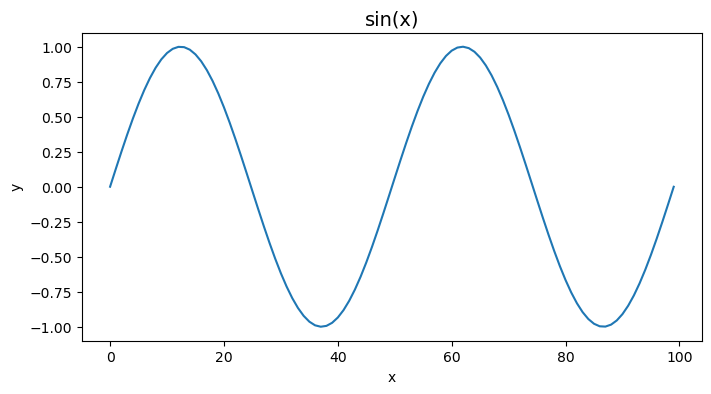

In [209]:
fig = plt.figure(figsize = (8,4))
ax = df['sin'].plot(kind='line')
ax.set_title('sin(x)',fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y')
# print(dir(ax))
plt.show()

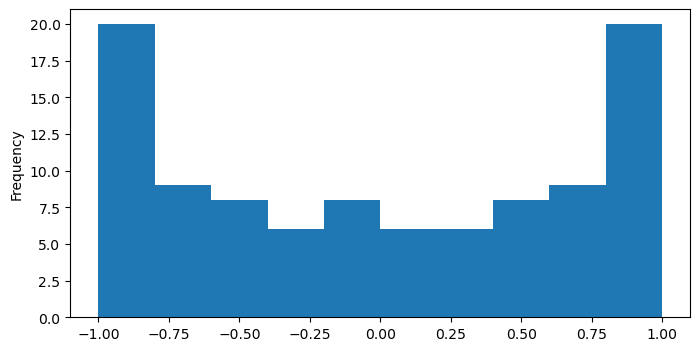

In [210]:
fig = plt.figure(figsize = (8,4))
ax = df['sin'].plot.hist()
plt.show()

<Figure size 800x400 with 0 Axes>

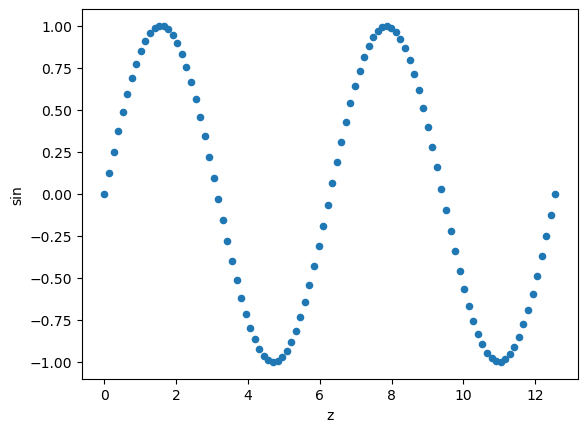

In [211]:
fig = plt.figure(figsize=(8,4))
ax=df.plot(kind='scatter', x = 'z' , y= 'sin')
# ax2=df.plot(kind= 'bar')
plt.show()

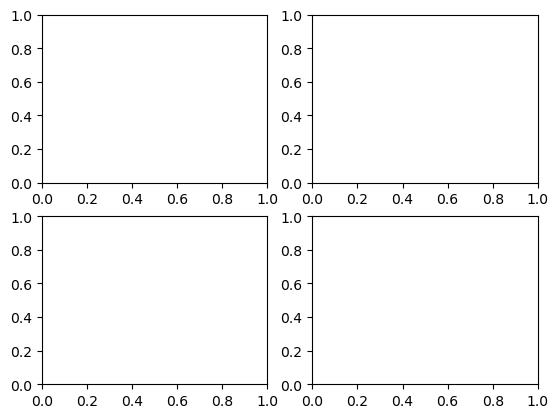

In [212]:
fig1, ax1 = plt.subplots(2,2)

In [213]:
import numpy as np
ts = pd.Series(np.ones(1000), index=pd.date_range(start='1/1/2000', periods=1000,freq='MS'))
ts.head()

2000-01-01    1.0
2000-02-01    1.0
2000-03-01    1.0
2000-04-01    1.0
2000-05-01    1.0
Freq: MS, dtype: float64

In [214]:
mu, sigma = 0, 1#mean and std
dfNormal = pd.DataFrame(np.random.normal(mu,sigma,(1000,4)), index=pd.date_range(start='1/1/2000', periods=1000,freq='W'), columns=list('ABCD'))
dfNormal.cumsum()#Return cumulative sum over a DataFrame or Series axis.
#dfNormal.head()

,A,B,C,D
2000-01-02,-0.515580,0.301622,-1.337113,0.372455
2000-01-09,-0.661873,1.634077,-1.945994,0.836266
2000-01-16,-1.301556,1.430031,-1.128399,0.848702
2000-01-23,-1.307862,0.720516,-2.604657,1.856739
2000-01-30,-0.185618,0.238268,-2.615499,1.370227
...,...,...,...,...
2019-01-27,-5.759263,30.704500,9.293308,47.524741
2019-02-03,-7.136298,31.046618,7.276116,47.085019
2019-02-10,-8.586657,30.968815,6.295330,46.310265
2019-02-17,-7.051397,32.452803,6.746344,46.001475


#### `describe()` method
The describe() method provides a quick overview of the **numerical columns** in a DataFrame. As the Name and Sex columns are textual data, these are by default not taken into account by the describe() method.

In [215]:
df.describe()

,x,y,z,sin
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,3185.500000,6.283000,-0.000002
std,29.011492,2912.065991,3.682408,0.707117
min,0.000000,0.000000,0.000000,-0.999872
25%,24.750000,564.250000,3.141500,-0.695901
50%,49.500000,2352.500000,6.283000,-0.000185
75%,74.250000,5365.750000,9.424500,0.695765
max,99.000000,9604.000000,12.566000,0.999878


#### DataFrame attribute 
##### `dtypes`
The data types in this DataFrame are integers (int64), floats (float64) and strings (object).

In [216]:
df.dtypes

x        int64
y        int64
z      float64
sin    float64
dtype: object

In [217]:
print('shape:', df.shape)
print('dimension:', df.ndim)
print('total  number of elements:', df.size, 'elements')
print()
print('The data:\n', df.values)
print()
print('The row index:', df.index)
print('The row index type:', type(df.index))
print()
print('The column index:', df.columns)
print('The column index Type:', type(df.columns))

shape: (100, 4)
dimension: 2
total  number of elements: 400 elements

The data:
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  1.26929293e-01  1.26588740e-01]
 [ 2.00000000e+00  1.00000000e+00  2.53858586e-01  2.51140740e-01]
 [ 3.00000000e+00  4.00000000e+00  3.80787879e-01  3.71652029e-01]
 [ 4.00000000e+00  9.00000000e+00  5.07717172e-01  4.86183651e-01]
 [ 5.00000000e+00  1.60000000e+01  6.34646465e-01  5.92892856e-01]
 [ 6.00000000e+00  2.50000000e+01  7.61575758e-01  6.90062755e-01]
 [ 7.00000000e+00  3.60000000e+01  8.88505051e-01  7.76129940e-01]
 [ 8.00000000e+00  4.90000000e+01  1.01543434e+00  8.49709640e-01]
 [ 9.00000000e+00  6.40000000e+01  1.14236364e+00  9.09617999e-01]
 [ 1.00000000e+01  8.10000000e+01  1.26929293e+00  9.54891125e-01]
 [ 1.10000000e+01  1.00000000e+02  1.39622222e+00  9.84800601e-01]
 [ 1.20000000e+01  1.21000000e+02  1.52315152e+00  9.98865201e-01]
 [ 1.30000000e+01  1.44000000e+02  1.65008081e+0

#### `info()`

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    int64  
 1   y       100 non-null    int64  
 2   z       100 non-null    float64
 3   sin     100 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


## Importing and Exporting data
![title](img/03_io_readwrite.svg)

- Impoting data in to pandas from many different file formats or data sources is supported by __read_*__ functions.
- Exporting data out of pandas is provided by different __to_*__ methods.

In [219]:
titanic= pd.read_csv("data/titanic.csv")
titanic.info()

FileNotFoundError: [Errno 2] No such file or directory: 'data/titanic.csv'

This tutorial uses the Titanic data set, stored as CSV. The data consists of the following data columns:

 - PassengerId: Id of every passenger.
 - Survived: This feature have value 0 and 1. 0 for not survived and 1 for survived.   
 - Pclass: There are 3 classes: Class 1, Class 2 and Class 3.   
 - Name: Name of passenger.  
 - Sex: Gender of passenger.  
 - Age: Age of passenger.   
 - SibSp: Indication that passenger have siblings and spouse.   
 - Parch: Whether a passenger is alone or have family.   
 - Ticket: Ticket number of passenger.  
 - Fare: Indicating the fare.  
 - Cabin: The cabin of passenger.  
 - Embarked: The embarked category.   

 ###### The **head/tail/info** methods and the dtypes attribute are convenient for a first check.

In [ ]:
ages = titanic["Age"]
ages.head(10)


In [ ]:
type(titanic["Age"])

In [ ]:
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

In [ ]:
type(titanic[["Age", "Sex"]])

In [ ]:
#if you don't encoding use the following snippet
#import chardet
#with open('data/FOLD1-a.csv', 'rb') as f:
#    enc = chardet.detect(f.read())  # or readline if the file is large
#print(enc['encoding'])
#fold=pd.read_csv("data/FOLD1-a.csv", encoding = enc['encoding'])

fold= pd.read_csv("data/FOLD1-a.csv",encoding = "UTF-16", parse_dates=["<DTYYYYMMDD>"])
#fold= pd.read_csv("data/FOLD1-a.csv",encoding = "UTF-16", parse_dates=["<DTYYYYMMDD>"],index_col=["<DTYYYYMMDD>"])
fold.info()
fold.head()

In [ ]:
fold.tail()

##### Accessing a row by index

In [ ]:
#fold.iloc[4,:]# 4th row
#fold.iloc[-1,:]# last row
fold.loc[(fold["<DTYYYYMMDD>"]=="2022-04-06"),:]

#### how easiy work with datetime

In [ ]:
#fold= pd.read_csv("data/FOLD1-a.csv",encoding = "UTF-16")
#fold["<DTYYYYMMDD>"] = pd.to_datetime(fold["<DTYYYYMMDD>"])#parse_dates
#fold.set_index(["<DTYYYYMMDD>"],inplace=True)#index_col

##fold.reset_index(inplace=True)
#fold.tail()

##### I’m interested in the passengers older than 35 years.

In [ ]:
above_35 = titanic[titanic["Age"] > 35]
above_35.shape

##### I’m interested in the Titanic passengers from cabin class 2 and 3.

In [ ]:
class_23 = titanic[titanic["Pclass"].isin([2, 3])]
class_23.head()

The above is equivalent to filtering by rows for which the class is either 2 or 3 and combining the two statements with an | (or) operator:

In [ ]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
class_23.head()

I want to work with passenger data for which the age is known.

In [ ]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

#### loc/iloc operators
When using **loc/iloc**, the part before the comma is the rows you want, and the part after the comma is the columns you want to select

###### I’m interested in the names of the passengers older than 35 years.

In [ ]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
adult_names.head()

In [ ]:
type(adult_names)

###### I’m interested in rows 10 till 25 and columns 3 to 5.

In [ ]:
titanic.iloc[9:25, 2:5]

###### Sort table rows

In [ ]:
titanic.sort_values(by="Age",ascending=True).head()

###### multi column sort

In [ ]:
titanic.sort_values(by=['Name', 'Age'], ascending=False).head()

## Null values

In [ ]:
titanic.isnull().sum().sum()

###### drop every row with NaN value

In [ ]:
titanic.dropna(axis = 0,inplace=False)

###### drop every column with NaN value

In [ ]:
titanic.dropna(axis = 1,inplace=False)

`fillna(method = 'ffill', axis=0, inplace=False)`    
    begin from __first row__ and fill the next row if its vlaue is null/Nan.  
    
`.fillna(method = 'backfill', axis=0, inplace=False)`   
    begin from __last row__ and fill the next row it its value is null/Nan.   
    
`.fillna(method = 'ffill', axis=1 inplace=False)`    
    begin from first __coulmn__ and fill the next row if its vlaue is null/Nan.  
    
`.fillna(method = 'backfill', axis=1, inplace=False)`  
    begin from __last column__ and fill the next row it its value is null/Nan.  


You can also use `.interpolate(method = 'linear', axis)` to replace null/NaN data.

## group and count the values of Series (suitable for Naminal/Oridinal variabe)

`value_counts()` Return a Series containing counts of unique values.

In [ ]:
titanic["Pclass"].value_counts().sort_index()

##### you can do the same , using `groupby()` method in `Pandas.Series`

In [ ]:
titanic["Pclass"].groupby(by=titanic["Pclass"]).count()

#### change data type to categorical=>ordinal

In [ ]:
#level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
temp_ds=titanic["Pclass"].value_counts().sort_index()
level_order=temp_ds.index
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
titanic['Pclass2'] = titanic['Pclass'].astype(ordered_cat)


In [ ]:
import seaborn as sb
base_color = sb.color_palette()[0]
sb.countplot(data = titanic, y = 'Pclass2', color = base_color)